# Python (базовый). 03. ООП
Практика к презентации "03_ООП.pptx" курса Python (basic)

### 01. Классы

In [2]:
class SchoolGroup:
    MAX_SIZE = 30

    def __init__(self, name, year, teacher):
        self.name = name
        self.year = year
        self.teacher = self.uppercase(teacher)

    def change_size(self, new_size: int):
        if new_size <= self.MAX_SIZE:
            self.size = new_size
            print(f'Размер класса изменен на {self.size}')
        else:
            print(f'Вместимость класса превышена ({self.MAX_SIZE})')

    @classmethod
    def change_max_size(cls, new_size):
        cls.MAX_SIZE = new_size

    @staticmethod
    def uppercase(some_str):
        return some_str.upper()



group1 = SchoolGroup('A', '9', 'Учитель')

In [46]:
group1.change_max_size(99)

In [7]:
group1.year + group1.name

'9A'

In [13]:
size = 32

if size <= group1.MAX_SIZE:
    group1.size = size

group1.size

20

In [15]:
SchoolGroup.MAX_SIZE = 32
SchoolGroup.MAX_SIZE

32

In [17]:
group2 = SchoolGroup('B', '9', 'Учитель')
group2.MAX_SIZE

32

In [22]:
group2.MAX_SIZE = 45

In [24]:
group2.__dict__

{'name': 'B', 'year': '9', 'teacher': 'Учитель', 'MAX_SIZE': 45}

In [25]:
group2.MAX_SIZE

45

In [26]:
group1.MAX_SIZE

32

In [40]:
group1.__dict__

{'name': 'A', 'year': '9', 'teacher': 'УЧИТЕЛЬ'}

In [23]:
SchoolGroup.__dict__

mappingproxy({'__module__': '__main__',
              'MAX_SIZE': 32,
              '__init__': <function __main__.SchoolGroup.__init__(self, name, year, teacher)>,
              '__dict__': <attribute '__dict__' of 'SchoolGroup' objects>,
              '__weakref__': <attribute '__weakref__' of 'SchoolGroup' objects>,
              '__doc__': None})

In [38]:
print(group1.__dict__)

group1.change_size(25)

print(group1.__dict__)

{'name': 'A', 'year': '9', 'teacher': 'Учитель'}


TypeError: SchoolGroup.change_size() takes 1 positional argument but 2 were given

## 02. Наследование

In [3]:
isinstance(group1, SchoolGroup)

True

In [4]:
issubclass(SchoolGroup, object)

True

In [5]:
issubclass(int, object)

True

In [6]:
issubclass(dict, object)

True

In [7]:
object.__dict__

mappingproxy({'__new__': <function object.__new__(*args, **kwargs)>,
              '__repr__': <slot wrapper '__repr__' of 'object' objects>,
              '__hash__': <slot wrapper '__hash__' of 'object' objects>,
              '__str__': <slot wrapper '__str__' of 'object' objects>,
              '__getattribute__': <slot wrapper '__getattribute__' of 'object' objects>,
              '__setattr__': <slot wrapper '__setattr__' of 'object' objects>,
              '__delattr__': <slot wrapper '__delattr__' of 'object' objects>,
              '__lt__': <slot wrapper '__lt__' of 'object' objects>,
              '__le__': <slot wrapper '__le__' of 'object' objects>,
              '__eq__': <slot wrapper '__eq__' of 'object' objects>,
              '__ne__': <slot wrapper '__ne__' of 'object' objects>,
              '__gt__': <slot wrapper '__gt__' of 'object' objects>,
              '__ge__': <slot wrapper '__ge__' of 'object' objects>,
              '__init__': <slot wrapper '__init__' of

## 03. Очко

In [27]:
import random

class Person:

    def __init__(self, name: str, surname: str) -> None:
        self.name = name
        self.surname = surname

class Player(Person):

    def __init__(self, name: str, surname: str) -> None:
        super().__init__(name, surname)
        self.score = 0

        self.history = {} # время и результат игр

    def __str__(self):
        return f"{self.name} {self.surname}"

class Card:
    NOMINAL = {
        '2': 2,
        '3': 3, 
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
        '10': 10,
        'Jack': 11,
        'Queen': 12,
        'King': 13,
        'Ace': 1
    }

    def __init__(self, suit, name) -> None:
        self.suit = suit
        self.name = name
        self.nominal = self.NOMINAL[name]

class Deck:

    def __init__(self) -> None:
        self.collection = []

        for suit in ['spades', 'diamonds', 'hearts', 'club']:
            for name in Card.NOMINAL.keys():
                self.collection.append(Card(suit, name))

        random.shuffle(self.collection)

    def __len__(self):
            return len(self.collection)

    def get_card(self):
        card = self.collection.pop(0)

        return card

    
    
class Game:

    def __init__(self) -> None:
        pass      

    def start_game(self):
        name = input("Введите имя игрока: ")
        surname = input("Введите фамилию игрока: ")
        self.player1 = Player(name, surname)
        self.player2 = Player('bot', '')
    
        self.deck = Deck()

        print('game started...')

        cnt = 1
        choice = True

        while choice and self.player1.score < 21:
            card = self.deck.get_card()
            self.player1.score += card.nominal

            choice = not bool(input("Продолжаете?"))

        print(f"{self.player1} набрал {self.player1.score}")

        while self.player2.score < 18:
            card = self.deck.get_card()
            self.player2.score += card.nominal

        print(f"{self.player2} набрал {self.player2.score}")

        if self.player1.score > 21 and self.player2.score > 21:
            print("Ничья")

        elif self.player1.score > 21 or (self.player1.score < self.player2.score):
            print(f"Выиграл {self.player2}")

        elif self.player2.score > 21 or (self.player2.score < self.player1.score):
            print(f"Выиграл {self.player1}")

        else:
            print(f"Ничья")






In [10]:
game.deck.collection[0].__dict__

{'suit': 'diamonds', 'name': '4', 'nominal': 4}

In [11]:
game.player1.__dict__

{'name': 'Alex', 'surname': 'Ivanov', 'score': 0, 'history': {}}

In [28]:
game = Game()
game.start_game()

game started...
ы\яв \ыв набрал 30
bot  набрал 19
Выиграл bot 


## 00. Дополнительно

In [1]:
import sys

In [3]:
sys.path

['c:\\Temp\\Python basic',
 'C:\\Users\\prepod\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\prepod\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\prepod\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\prepod\\AppData\\Local\\Programs\\Python\\Python310',
 'c:\\Temp\\Python basic\\python_tutor\\.venv',
 '',
 'c:\\Temp\\Python basic\\python_tutor\\.venv\\lib\\site-packages',
 'c:\\Temp\\Python basic\\python_tutor\\.venv\\lib\\site-packages\\win32',
 'c:\\Temp\\Python basic\\python_tutor\\.venv\\lib\\site-packages\\win32\\lib',
 'c:\\Temp\\Python basic\\python_tutor\\.venv\\lib\\site-packages\\Pythonwin']

In [4]:
!pip install requests

  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/5c/f2/f3faa20684729d3910af2ee142e30432c7a46a817eadeeab87366ed87bbb/charset_normalizer-3.2.0-cp310-cp310-win_amd64.whl.metadata
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Obtaining dependency information for urllib3<3,>=1.21.1 from https://files.pythonhosted.org/packages/9b/81/62fd61001fa4b9d0df6e31d47ff49cfa9de4af03adecf339c7bc30656b37/urllib3-2.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for certifi>=2017.4.17 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Using cached certifi-2023.7.22-py3-

In [6]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/c5/89/ce1c7dc497f9a20644f6a7d2dd5bce6378a48321955178197fa3b55d6fe3/pandas-2.1.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.22.4 from https://files.pythonhosted.org/packages/b7/db/4d37359e2c9cf8bf071c08b8a6f7374648a5ab2e76e2e22e3b808f81d507/numpy-1.25.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ---- ---------------------------------- 41.0/341.8 kB 1.9 MB/s eta 0:00:01
     --------------- ---------------------- 143.4/341.8 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  337.9/341.8 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 

In [26]:
import pandas as pd

In [27]:
df = pd.read_html("https://goodmeteo.ru/pogoda-ekaterinburg/", 
                  encoding='UTF-8',
                  header=0,
                  index_col=0)[0]

In [28]:
df

,Температура,Осадки,Ветер,Влажность,Облачность,Давление
00:00,"+10,6°",легкий дождь,"2,2 м/с, Юго-Восток",93%,59%,756 мм рт. ст.
01:00,"+10,8°",легкий дождь,"2,5 м/с, Юго-Восток",93%,69%,756 мм рт. ст.
02:00,"+11,0°",легкий дождь,"2,7 м/с, Юго-Восток",93%,79%,756 мм рт. ст.
03:00,"+11,4°",легкий дождь,"3,2 м/с, Юго-Восток",93%,100%,756 мм рт. ст.
04:00,"+12,2°",легкий дождь,"3,6 м/с, Юго-Восток",90%,75%,756 мм рт. ст.
05:00,"+13,1°",легкий дождь,"4,1 м/с, Юго-Восток",87%,50%,756 мм рт. ст.
06:00,"+14,8°",ясно,"5,0 м/с, Юго-Восток",82%,0%,756 мм рт. ст.
07:00,"+15,1°",ясно,"5,2 м/с, Юго-Восток",80%,8%,756 мм рт. ст.
08:00,"+15,3°",ясно,"5,3 м/с, Юго-Восток",78%,16%,756 мм рт. ст.
09:00,"+15,8°",облачно,"5,6 м/с, Юго-Восток",74%,33%,756 мм рт. ст.


<Axes: >

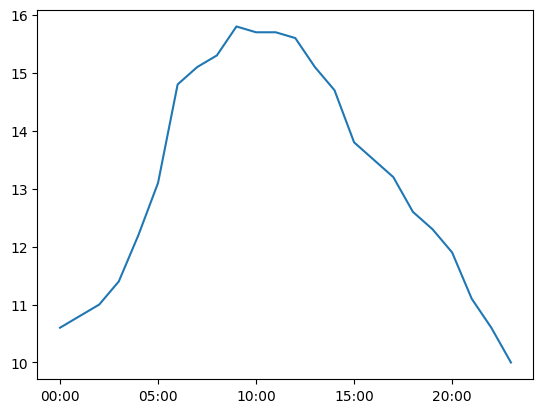

In [31]:
df['temp'] = df['Температура'].apply(lambda x: float(x[1:-1].replace(',', '.')))
df['temp'].plot()

In [25]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/ff/1f/2b83c7acf453318a80dc619e99fc30a663b2c1fb18be3d358a96addfecd9/matplotlib-3.7.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/94/0a/5eb57dd395fade977786b2d2c98c2bee8234358794be44422fe58a719d42/contourpy-1.1.0-cp310-cp310-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/1c/c6/408ee90eae2fd7ef85c5baaedfc8d533805f4c54fc6670dbde9539f1277b/fonttools-4.42.1-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ------- ----------------------------- 30.7/154.1 kB 660.6 kB/s eta 0:00:01
     ----------------- ------------------- 71.7/154.1 kB 653.6 kB/s eta 0:00:01
     -------------------------- --------- 112.6/154.1 kB 7